# Prediction of the target attribute *'round_winner'*

#### Preproccesing

In [1]:
#imports of required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#loading of dataset
df = pd.read_csv('./data/csgo_round_snapshots_processed.csv', sep=',')

In [3]:
#exploring data
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_category_machine gun_amount,ct_weapon_p90_price,ct_weapon_m249_price,ct_category_machine gun_price,ct_category_machine gun_amount,ct_players_alive_surplus,time_left_cat,players_alive,round_number,match_quarters
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,early,10.0,1.0,-1
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,early,10.0,1.0,-1
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,mid,8.0,1.0,-1
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,mid,8.0,1.0,-1
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,early,10.0,2.0,1


In [4]:
#looking at the shape of data
df.shape

(122410, 213)

In [5]:
#encoding 'map' attribute
le_map = LabelEncoder() 
df['map'] = le_map.fit_transform(df['map'])
map_mappings = {index: label for index, label in enumerate(le_map.classes_)}
map_mappings

{0: 'de_cache',
 1: 'de_dust2',
 2: 'de_inferno',
 3: 'de_mirage',
 4: 'de_nuke',
 5: 'de_overpass',
 6: 'de_train',
 7: 'de_vertigo'}

In [6]:
#encoding 'bomb_planted' attribute
le_bomb_planted = LabelEncoder() 
df['bomb_planted'] = le_bomb_planted.fit_transform(df['bomb_planted'])
bomb_planted_mappings = {index: label for index, label in enumerate(le_bomb_planted.classes_)}
bomb_planted_mappings

{0: False, 1: True}

In [7]:
#encoding 'round_winner' attribute
le_round_winner = LabelEncoder() 
df['round_winner'] = le_round_winner.fit_transform(df['round_winner'])
winner_mappings = {index: label for index, label in enumerate(le_round_winner.classes_)}
winner_mappings

{0: 'CT', 1: 'T'}

In [8]:
#y = labels
y = df['round_winner']

#X = features
X = df[['ct_health', 't_health', 'ct_armor', 'map', 't_armor', 'bomb_planted', 'ct_players_alive', 't_players_alive', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_overall_investment', 't_overall_investment']]
X_columns = X.columns.tolist()

In [9]:
X

,ct_health,t_health,ct_armor,map,t_armor,bomb_planted,ct_players_alive,t_players_alive,ct_helmets,t_helmets,ct_defuse_kits,ct_overall_investment,t_overall_investment
0,500.0,500.0,0.0,1,0.0,0,5.0,5.0,0.0,0.0,0.0,1000.0,1000.0
1,500.0,500.0,400.0,1,300.0,0,5.0,5.0,0.0,0.0,1.0,4000.0,3550.0
2,391.0,400.0,294.0,1,200.0,0,4.0,4.0,0.0,0.0,1.0,3150.0,2700.0
3,391.0,400.0,294.0,1,200.0,0,4.0,4.0,0.0,0.0,1.0,3150.0,2100.0
4,500.0,500.0,192.0,1,0.0,0,5.0,5.0,0.0,0.0,1.0,2700.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,200.0,242.0,195.0,6,359.0,1,2.0,4.0,2.0,4.0,1.0,7650.0,19150.0
122406,500.0,500.0,95.0,6,175.0,0,5.0,5.0,1.0,2.0,1.0,6000.0,11150.0
122407,500.0,500.0,495.0,6,475.0,0,5.0,5.0,3.0,5.0,1.0,13500.0,23950.0
122408,500.0,500.0,495.0,6,475.0,0,5.0,5.0,3.0,5.0,1.0,11400.0,26150.0


In [10]:
y.value_counts(sort=False)

0    60004
1    62406
Name: round_winner, dtype: int64

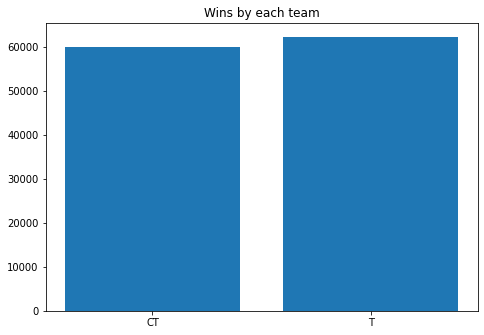

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = list(le_round_winner.classes_)
counts = list(y.value_counts(sort=False))
ax.bar(classes,counts)
plt.title("Wins by each team")
plt.show()

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_columns)

#### Training and testing data

In [13]:
#statistics for each column
df.describe()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_category_machine gun_price,t_category_machine gun_amount,ct_weapon_p90_price,ct_weapon_m249_price,ct_category_machine gun_price,ct_category_machine gun_amount,ct_players_alive_surplus,players_alive,round_number,match_quarters
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,3.520170,0.111788,412.106568,402.714500,314.142121,298.444670,9789.023773,...,0.046565,0.000008,0.383956,0.042480,0.042480,0.000008,0.007565,8.539940,14.489674,1.822653
std,54.465238,4.790362,4.823543,1.929088,0.315107,132.293290,139.919033,171.029736,174.576545,11215.042286,...,16.291700,0.002858,30.035904,14.862604,14.862604,0.002858,1.053624,2.194061,8.670470,1.492090
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,1.000000,-1.000000
25%,54.920000,3.000000,3.000000,2.000000,0.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,1.000000
50%,94.910000,6.000000,6.000000,3.000000,0.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,14.000000,2.000000
75%,166.917500,10.000000,10.000000,5.000000,0.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,21.000000,3.000000
max,175.000000,32.000000,33.000000,7.000000,1.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,...,5700.000000,1.000000,2350.000000,5200.000000,5200.000000,1.000000,5.000000,10.000000,66.000000,4.000000


In [14]:
# get indexes of rows belonging to train and test datasets
train_idx, test_idx = train_test_split(np.array(range(X.shape[0])), test_size=0.3, random_state=42)
# generated folds = -1 is training dataset, 0 is testing dataset
folds = [0 if idx in test_idx else -1 for idx in list(range(X.shape[0]))]

# define splits for CV
splits = PredefinedSplit(test_fold=folds)

X_train = X.loc[train_idx]
y_train = y.loc[train_idx]
X_test = X.loc[test_idx]
y_test = y.loc[test_idx]

### Random Forest

In [15]:
#RandomForestClassifier
#create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=42)

#fit the classifier to the training data
rfc.fit(X_train, y_train)

#print the accuracy on train and test data
print("Accuracy on train data:", rfc.score(X_train, y_train))
print("Accuracy on test data:", rfc.score(X_test, y_test))

Accuracy on train data: 0.9756439133124044
Accuracy on test data: 0.8101189989924571


In [16]:
#tuning Random Forest classifier
param_grid = { 
    'n_estimators': [100, 250],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [20, 30],
    'criterion' :['gini', 'entropy']
}

In [17]:
#looking for the best parameters of random forest classifier
cv_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = splits, verbose=2)
cv_rfc.fit(X, y)

Fitting 1 folds for each of 16 candidates, totalling 16 fits
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=100; total time=  14.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, n_estimators=250; total time=  36.2s
[CV] END criterion=gini, max_depth=20, max_features=log2, n_estimators=100; total time=  15.2s
[CV] END criterion=gini, max_depth=20, max_features=log2, n_estimators=250; total time=  36.6s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=100; total time=  16.6s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, n_estimators=250; total time=  42.2s
[CV] END criterion=gini, max_depth=30, max_features=log2, n_estimators=100; total time=  17.3s
[CV] END criterion=gini, max_depth=30, max_features=log2, n_estimators=250; total time=  44.4s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=100; total time=  15.9s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, n_estimators=250; to

GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ...,  0, -1])),
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 250]},
             verbose=2)

In [25]:
# taking a look at CV results
cv_rfc.cv_results_

{'mean_fit_time': array([13.55709982, 33.8104353 , 14.36596704, 34.18860173, 15.6119957 ,
        39.4989779 , 16.07297206, 41.54899859, 15.08299923, 37.07307243,
        14.63361549, 37.31682324, 17.99499798, 45.92301869, 19.18298125,
        44.31900883]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([1.00155234, 2.45099807, 0.94403553, 2.54700708, 1.11497545,
        2.75599623, 1.28200459, 2.96302414, 0.93800235, 2.4309988 ,
        0.89020753, 2.28300881, 1.08399725, 2.96296883, 1.16199684,
        2.6650002 ]),
 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'gini', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy', 'entropy', 'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False,
      

In [26]:
#best parameters
cv_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 250}

In [28]:
#storing the predictions of random forest for evaluation
rfc_predictions = cv_rfc.best_estimator_.predict(X_test)

In [29]:
#accuracy score on test data for random forest
rfc_acc = accuracy_score(y_test, rfc_predictions)
print(f'Random Forest accuracy after parameter tuning: {rfc_acc*100:.2f}%')

Random Forest accuracy after parameter tuning: 98.18%


In [30]:
#classification report for random forest
rfc_report = classification_report(y_test, rfc_predictions, output_dict=True)
df_report = pd.DataFrame(rfc_report).transpose()
df_report

,precision,recall,f1-score,support
0,0.985370,0.977457,0.981398,18054.000000
1,0.978367,0.985966,0.982152,18669.000000
accuracy,0.981783,0.981783,0.981783,0.981783
macro avg,0.981869,0.981711,0.981775,36723.000000
weighted avg,0.981810,0.981783,0.981781,36723.000000


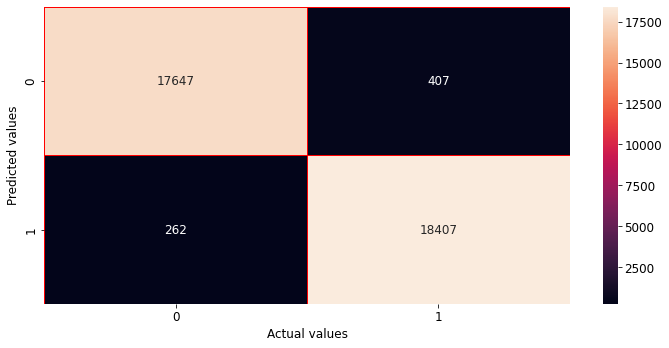

In [31]:
#confusion matrix for random forest
plt.figure(figsize = (10, 5))
sns.heatmap(confusion_matrix(y_test, rfc_predictions),
    annot = True,
    fmt = ".0f",
    linewidths = 1,
    linecolor = "red",
    xticklabels = rfc.classes_,
    yticklabels = rfc.classes_)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

In [32]:
plt.rcParams["figure.figsize"] = (6, 10)
plt.rcParams["font.size"] = 12

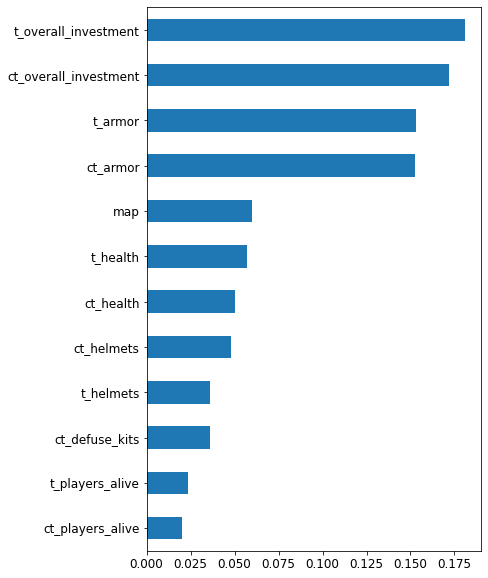

In [33]:
#plot the most important features for random forest classifier in its decesion making
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh').invert_yaxis()